#1 The Simple Linear Regression (SLR) model predicts an outcome variable Y based on a predictor X through the equation Y=β0+β1X+ε, where β0	is the intercept, β1 is the slope, and ε is an error term that accounts for randomness, assumed to be normally distributed with mean 0. This model captures the average relationship between 
X and Y, with  Y values varying around the line due to ε, making Y approximately normally distributed around its predicted values.








In [1]:
import numpy as np
import pandas as pd

def simulate_slr_data(beta_0, beta_1, sigma, n_samples, random_seed=0):
    """
    Simulate data based on a theoretical Simple Linear Regression (SLR) model.
    
    Parameters:
    - beta_0 (float): Intercept of the regression model.
    - beta_1 (float): Slope of the regression model.
    - sigma (float): Standard deviation of the error term.
    - n_samples (int): Number of data points to generate.
    - random_seed (int): Seed for reproducibility.
    
    Returns:
    - pd.DataFrame: DataFrame with predictor 'X' and outcome 'Y' based on the model.
    """
    # Set random seed for reproducibility
    np.random.seed(random_seed)
    
    # Generate predictor variable X
    X = np.linspace(0, 10, n_samples)
    
    # Generate random errors from a normal distribution
    errors = np.random.normal(0, sigma, n_samples)
    
    # Calculate outcome variable Y based on the model Y = beta_0 + beta_1 * X + error
    Y = beta_0 + beta_1 * X + errors
    
    # Create a DataFrame to hold the data
    data = pd.DataFrame({'X': X, 'Y': Y})
    
    return data

# Parameters for the theoretical model
beta_0 = 2      # Intercept
beta_1 = 0.5    # Slope
sigma = 1       # Standard deviation of the error term
n_samples = 100 # Number of samples

# Simulate data
data = simulate_slr_data(beta_0, beta_1, sigma, n_samples)

# Display the first few rows of the simulated data
print(data.head())



         X         Y
0  0.00000  3.764052
1  0.10101  2.450662
2  0.20202  3.079748
3  0.30303  4.392408
4  0.40404  4.069578


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     182.7
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           3.98e-24
Time:                        03:35:10   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2085      0.201     10.968      0.0

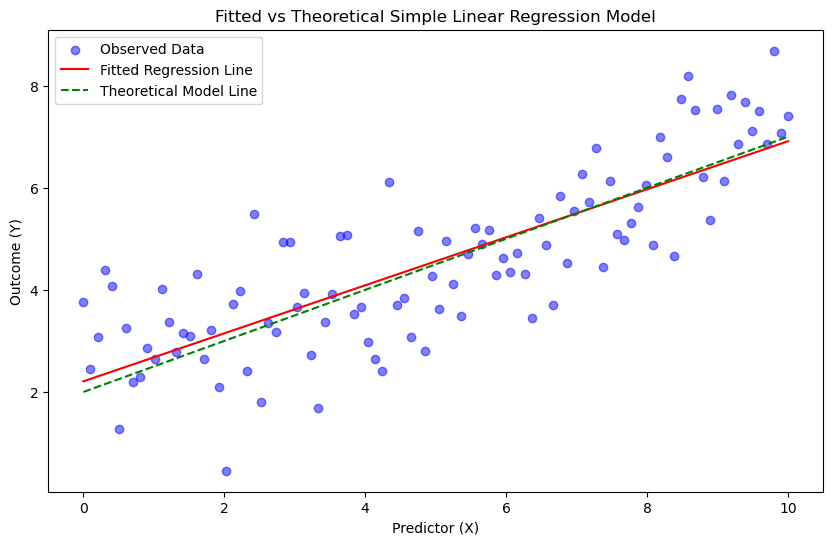

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Define the theoretical Simple Linear Regression model as a function
def simulate_slr_data(beta_0, beta_1, sigma, n_samples, random_seed=0):
    """
    Simulate data based on a theoretical Simple Linear Regression (SLR) model.
    
    Parameters:
    - beta_0 (float): Intercept of the regression model.
    - beta_1 (float): Slope of the regression model.
    - sigma (float): Standard deviation of the error term.
    - n_samples (int): Number of data points to generate.
    - random_seed (int): Seed for reproducibility.
    
    Returns:
    - pd.DataFrame: DataFrame with predictor 'X' and outcome 'Y' based on the model.
    """
    # Set random seed for reproducibility
    np.random.seed(random_seed)
    
    # Generate predictor variable X
    X = np.linspace(0, 10, n_samples)
    
    # Generate random errors from a normal distribution
    errors = np.random.normal(0, sigma, n_samples)
    
    # Calculate outcome variable Y based on the model Y = beta_0 + beta_1 * X + error
    Y = beta_0 + beta_1 * X + errors
    
    # Create a DataFrame to hold the data
    data = pd.DataFrame({'X': X, 'Y': Y})
    
    return data

# Parameters for the theoretical model
beta_0 = 2      # Intercept
beta_1 = 0.5    # Slope
sigma = 1       # Standard deviation of the error term
n_samples = 100 # Number of samples

# Simulate data
data = simulate_slr_data(beta_0, beta_1, sigma, n_samples)

# Fit a Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Print model summary
print(model.summary())

# Plot the data points, the theoretical line, and the fitted regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', alpha=0.5, label='Observed Data')
plt.plot(data['X'], model.predict(data['X']), color='red', label='Fitted Regression Line')
plt.plot(data['X'], beta_0 + beta_1 * data['X'], color='green', linestyle='--', label='Theoretical Model Line')
plt.xlabel("Predictor (X)")
plt.ylabel("Outcome (Y)")
plt.title("Fitted vs Theoretical Simple Linear Regression Model")
plt.legend()
plt.show()


#3 The theoretivcal line(in green) represents the exact theoretical relationship based on the inputted slope and intercept. The fitted line(in red) is a line fitted to the randomly simulated data, and due to random sampling variation, it appears slightly different from the theoretical line.

#4 The fitted_model.fittedvalues are calculated by applying the formula Yi= β0 + β1Xi, using the estimnated parameters β and β0 found ion. fitted_model.params. So the fitted_model.fittedvalues depend directly on these values.


#5: The Ordinary Least Squares (OLS) method chooses a line that minimizes the sum of the squared differences (errors) between observed values and predicted values. The reason OLS uses squares is to ensure that both positive and negative errors don't cancel and to give more weight to larger errors, leading to a "best-fit" line that balances all points as closely as possible.

#6: In Simple Linear Regression, the expressions 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()fitted_model.rsquared, and np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 all represent R-squared, which measures the proportion of variance in Y explained by the model. A higher R-squared indicates a better fit, reflecting the strength of the relationship between Y and the predictor X. These expressions help assess the model’s accuracy in capturing the variation in Y.R-squared is derived by comparing the variability in 
Y explained by the model’s predictions to the total variability in Y.

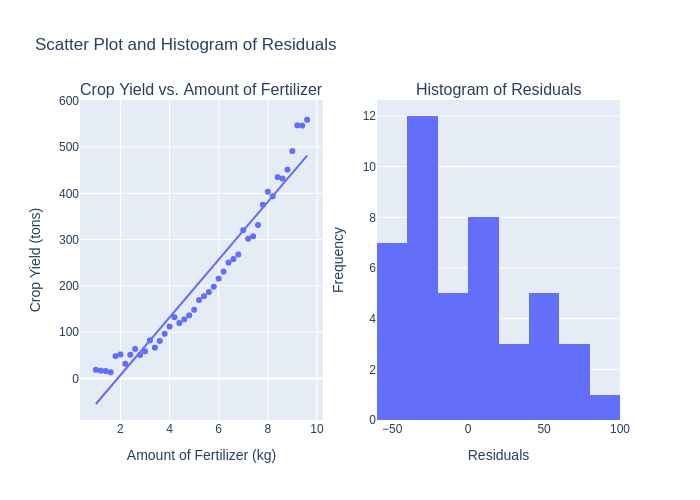

In [3]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


#7 The simple linear regression model assumes linearity, but that might not be the case here, as I can see a curve and the residual plot has a patten.

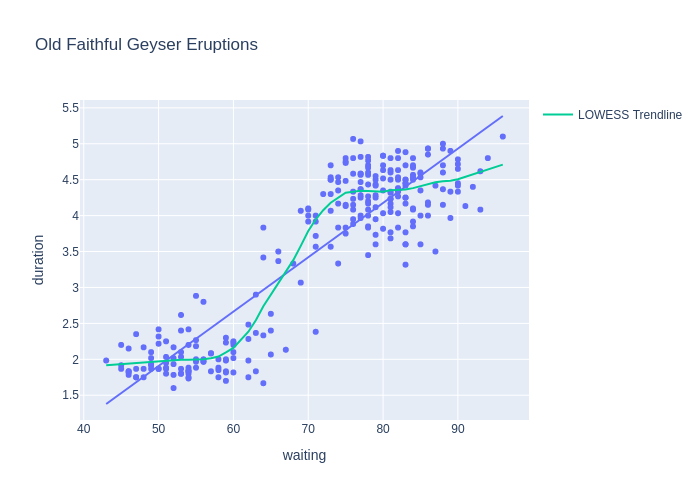

In [4]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

8: H0:B1 = 0 

In [5]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:35:12   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


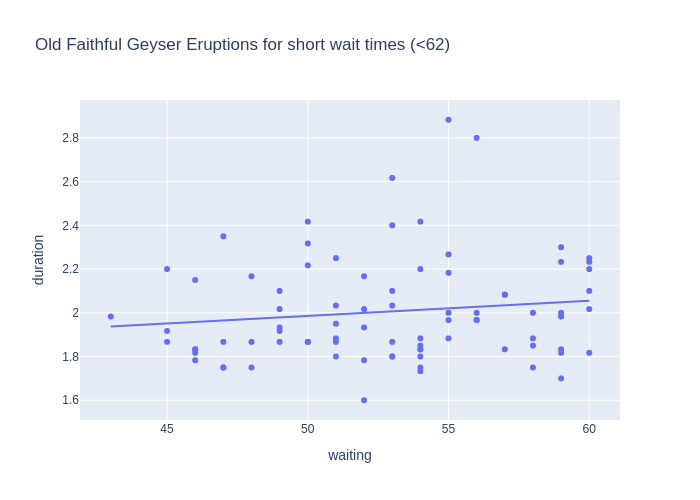

In [6]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

9: We will perform an analysis using hypothesis testing with an alpha value of 0.05.


Results for wait times < 62 minutes:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


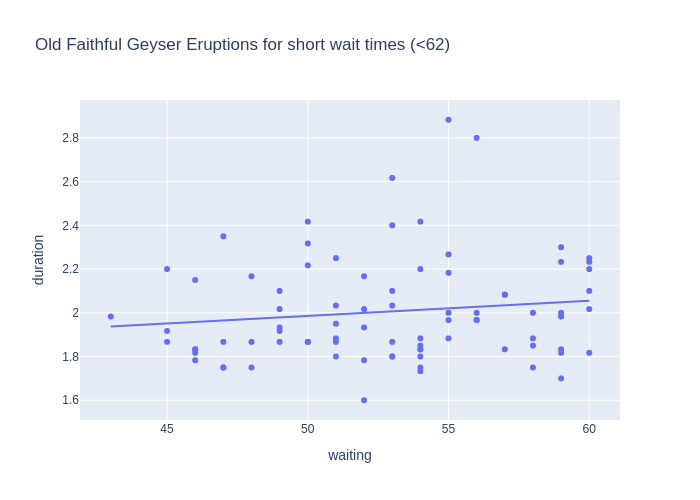


Results for wait times < 64 minutes:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


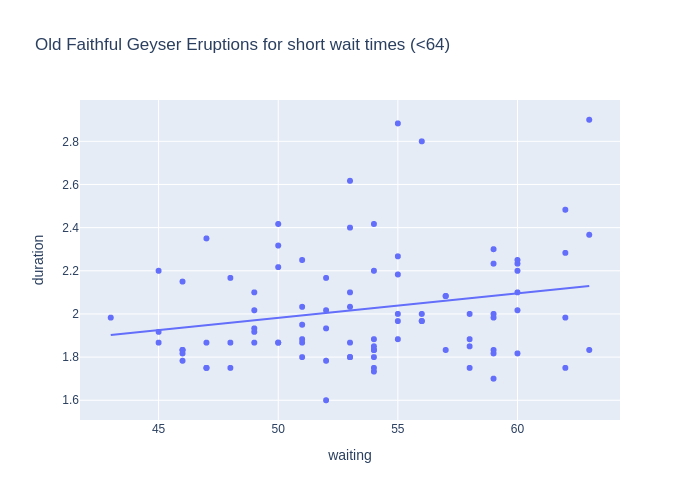


Results for wait times < 66 minutes:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


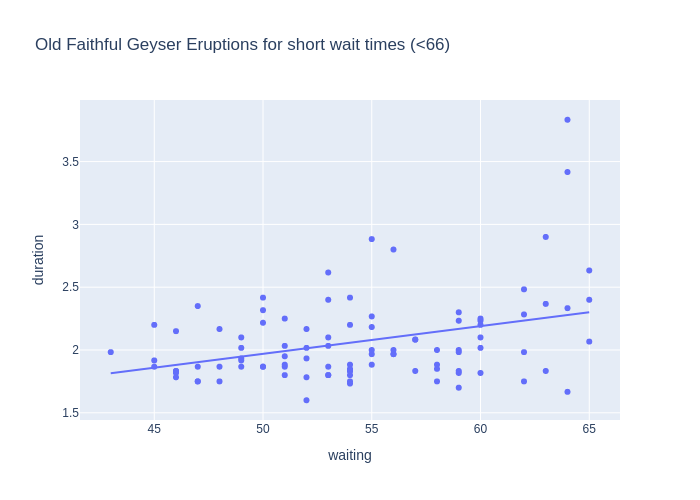

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf

# Define short wait limits
for short_wait_limit in [62, 64, 66]:
    short_wait = old_faithful['waiting'] < short_wait_limit
    
    # Fit and summarize the linear model
    print(f"\nResults for wait times < {short_wait_limit} minutes:")
    print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])
    
    # Scatter plot with trendline
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                     title=f"Old Faithful Geyser Eruptions for short wait times (<{short_wait_limit})", 
                     trendline='ols')
    fig.show(renderer="png")


9(cont): For wait times of less thant 62 minutes, the P value is 0.238, which is above the alpha value of 0.05. Therefore, we fail to reject the null hypothesis. We do not have sufficient evidence to support a linear assoication between waiting time and eruption duration when wait times are below 62 minutes.  For wait times of less thant 64 minutes, the P value is 0.036, which is below the alpha value of 0.05. Therefore, we reject the null hypothesis. We have sufficient evidence to support a linear assoication between waiting time and eruption duration when wait times are below 64 minutes. For wait times of less thant 67 minutes, the P value is 0.000, which is below the alpha value of 0.05. Therefore, we reject the null hypothesis. We have sufficient evidence to support a linear assoication between waiting time and eruption duration when wait times are below 66 minutes. This suggests that the linear relationship observed in the full dataset becomes apparent as we include slightly longer short wait times, potentially indicating that shorter wait times alone (<62 minutes) do not have a meaningful association with eruption duration. However, as the range expands, the relationship strengthens, especially as we approach wait times of up to 66 minutes.



                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


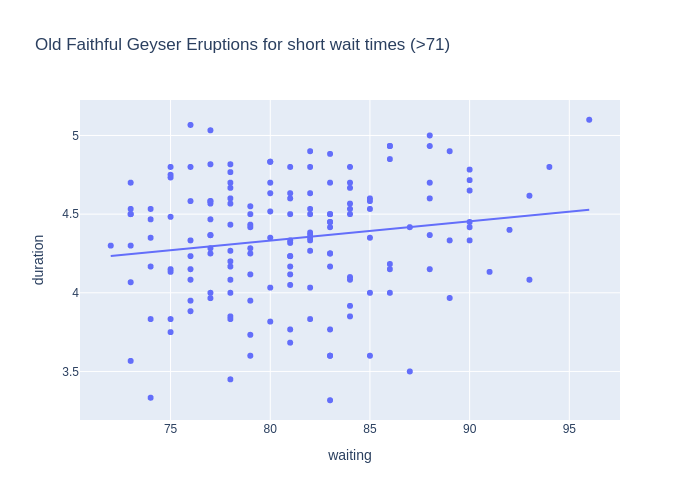

In [8]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Bootstrapped 95% CI for the slope coefficient: [0.00063515 0.02404378]
Does the bootstrapped CI contain the observed slope? True
Simulated p-value under the null hypothesis: 0.031


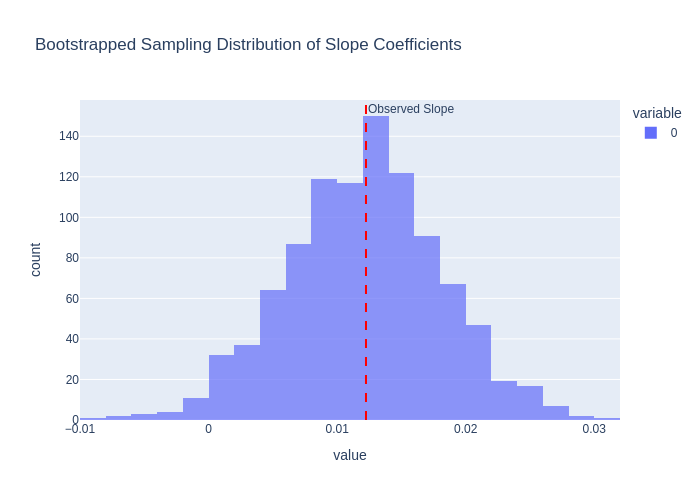

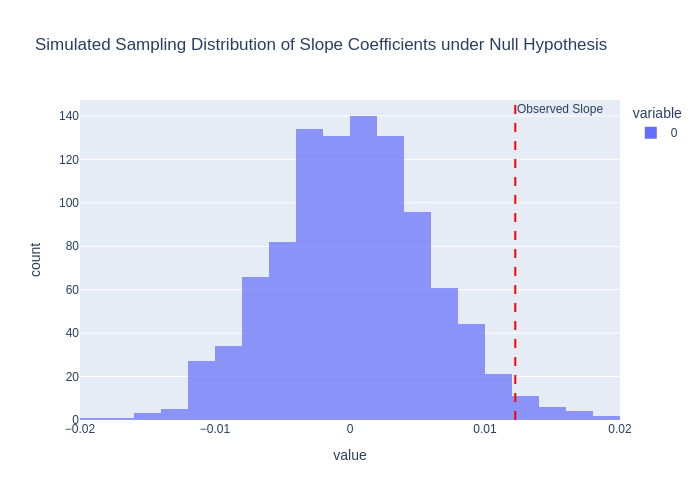

In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf
from scipy import stats

# Filter the Old Faithful dataset for long wait times
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
n = long_wait.sum()
long_wait_data = old_faithful[long_wait]

# Number of bootstrap and simulation iterations
num_iterations = 1000

# Step 1: Bootstrap the slope coefficients for the long wait times dataset
bootstrapped_slope_coefficients = []
for _ in range(num_iterations):
    # Create a bootstrap sample
    bootstrap_sample = long_wait_data.sample(n=n, replace=True)
    # Fit linear model and collect slope coefficient
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(model.params['waiting'])

# Convert to numpy array for easier calculations
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Calculate the 95% bootstrap confidence interval for the slope
boot_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Step 2: Simulate samples under null hypothesis (no linear association)
simulated_slope_coefficients = []
for _ in range(num_iterations):
    # Create a simulated dataset under the null hypothesis (no linear association)
    old_faithful_simulation = long_wait_data.copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=n)
    # Fit linear model and collect slope coefficient
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params['waiting'])

# Convert to numpy array for easier calculations
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Step 3: Check if the observed slope is within the 95% bootstrapped CI and calculate p-value
# Fit the model to the actual long wait data
observed_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
observed_slope = observed_model.params['waiting']

# Check if observed slope is within 95% bootstrapped CI
contains_observed_slope = boot_ci[0] <= observed_slope <= boot_ci[1]

# Calculate the p-value for the null hypothesis using the simulated slope coefficients
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Print results
print("Bootstrapped 95% CI for the slope coefficient:", boot_ci)
print("Does the bootstrapped CI contain the observed slope?", contains_observed_slope)
print("Simulated p-value under the null hypothesis:", simulated_p_value)

# Step 4: Visualize the bootstrapped and simulated sampling distributions of slope coefficients
fig = px.histogram(bootstrapped_slope_coefficients, nbins=30, opacity=0.7,
                   title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig.add_vline(x=observed_slope, line_color="red", line_dash="dash", annotation_text="Observed Slope")
fig.show(renderer="png")

fig = px.histogram(simulated_slope_coefficients, nbins=30, opacity=0.7,
                   title="Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis")
fig.add_vline(x=observed_slope, line_color="red", line_dash="dash", annotation_text="Observed Slope")
fig.show(renderer="png")


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


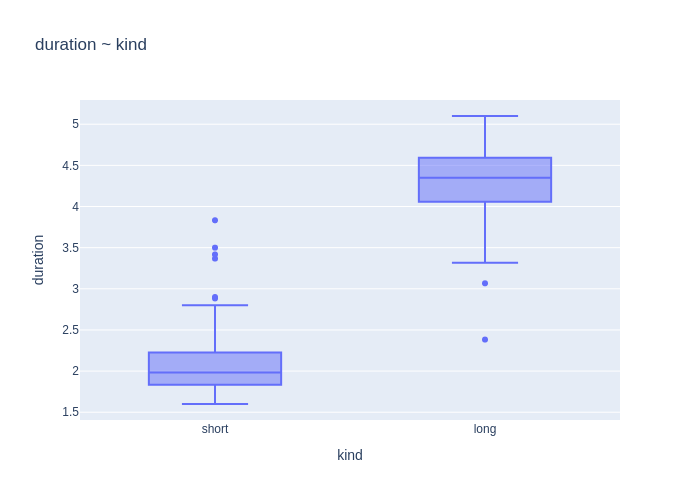

In [10]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

11: The indicator model treats waiting as a categorical variable, with the categories being short and long, and then compares the average duration between the two groups. The original model treats waiting as a continuous variable, creating a linear relationship whose slope shows the expected change for duration for each uptick in waiting. It assumes that the actual relationship is linear. The p value for the indicator model is 0.000, which is less than our alpha value of 0.05, so we have enough evidence to reject the null hypothesis. We conclude that there is a difference between the short and long waits.l 

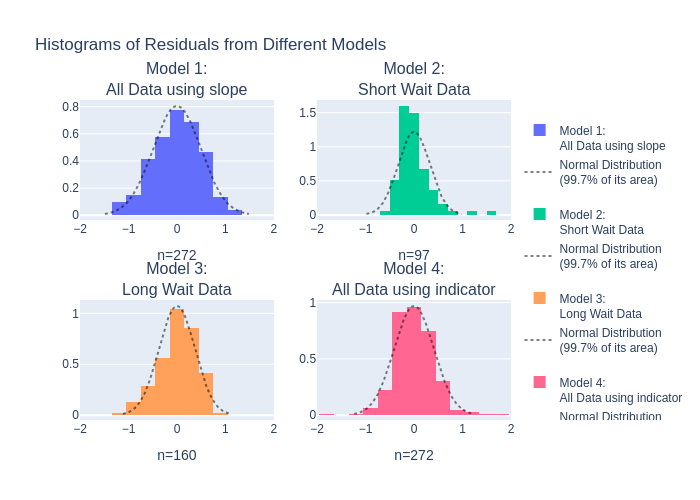

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

12: Model 1 is best. This is because Model 1 is the most normally distributed. Models 2,3 and 4 are not normally distibuted, so the error terms aren't normally distributed

In [12]:
mean_diffs = []
for _ in range(1000):
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1, replace=False).values)
    mean_diff = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    mean_diffs.append(mean_diff)

# Observed mean difference
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Calculate p-value
p_value = np.mean(np.abs(mean_diffs) >= np.abs(observed_diff))


In [13]:
boot_mean_diffs = []
for _ in range(1000):
    boot_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    mean_diff = boot_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    boot_mean_diffs.append(mean_diff)

# Calculate 95% confidence interval
ci_lower, ci_upper = np.quantile(boot_mean_diffs, [0.025, 0.975])


In [14]:
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
display(model.summary().tables[1])


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


13: Permutation and Bootstrap: Empirical, non-parametric, flexible methods that avoid assumptions about distribution.
Indicator Model: A parametric, linear regression method that directly estimates the difference and is more efficient if assumptions hold.
Interpretation: The permutation test provides a p-value, the bootstrap offers a confidence interval, and the indicator model gives both an estimate and a p-value.







Chatbot Summaries: 1: This chat discusses three statistical approaches for analyzing eruption duration differences between "short" and "long" wait times:

Permutation Test: A non-parametric method that shuffles labels to test if observed differences in means could be due to chance. It generates a p-value by comparing the actual mean difference to a distribution of shuffled differences.
Bootstrap Confidence Interval: A non-parametric approach that resamples data within each group to estimate the difference in mean durations. It generates a 95% confidence interval for the difference.
Indicator Variable Model: A parametric approach using linear regression with an indicator variable for the "kind" of wait time. It assumes normality and linearity and provides an estimate of the effect size along with a p-value.
These methods differ in their assumptions, flexibility, and the type of inference they provide. Permutation and bootstrap are more flexible and robust, avoiding model assumptions, while the indicator model is more efficient when assumptions hold. The permutation test gives a p-value, the bootstrap provides a confidence interval, and the indicator model offers both a coefficient and a p-value.
https://chatgpt.com/share/672d8791-5ab8-8010-9b7f-a26b30ff5b41
2: https://chatgpt.com/share/672d889b-1918-8010-b9b7-a50e285d9fcf
In this chat, we explored the Simple Linear Regression (SLR) model, focusing on how the model's components, such as the predictor variable 
X
X, outcome variable 
Y
Y, coefficients (slope and intercept), and error term, combine to form predictions. We discussed how the model minimizes the sum of squared errors (OLS method), which is why the term "squares" is used to give more weight to larger errors. We also explained that R-squared measures the proportion of variance in
Y
Y explained by the model, and how expressions like fitted_model.rsquared and np.corrcoef(...)[0,1]**2 capture the strength of the model's fit and the relationship between
Y
Y and the predictor.

Additionally, we reviewed how the assumptions of SLR, such as linearity and homoscedasticity, may not hold for the example data on fertilizer amount and crop yield. The data exhibits a non-linear relationship and potential heteroscedasticity, which might require alternative models or transformations for more accurate results.



